In [1]:
%load_ext autoreload
%autoreload 2

# Visualize

In [2]:
from Painter import Painter
from config import config

In [3]:
name_a, name_b = config.samples[config.task.name].reference, config.samples[config.task.name].target
name_a, name_b

('1403715273612143104.png', '1403715273962142976.png')

num_rows, num_cols (6, 6)
patch_height, patch_width (84, 84)


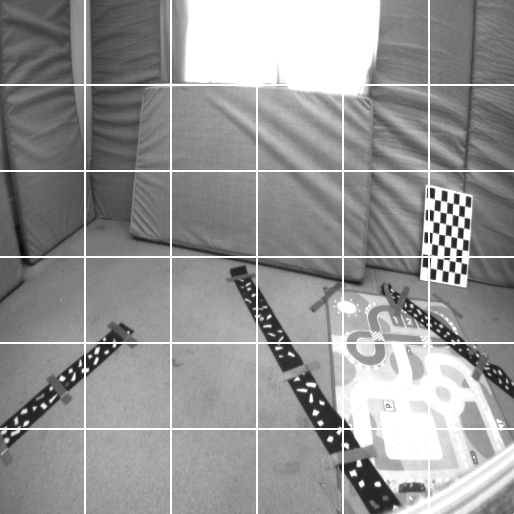

In [4]:
Painter.show_patches(name_a)

# Keypoints

INFO     | show_keypoints | Number of Keypoints 325


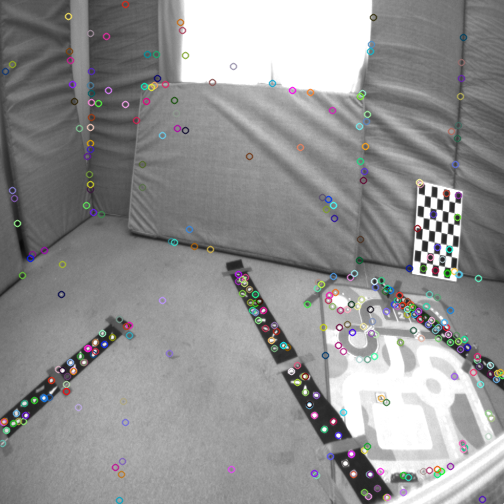

In [5]:
Painter.show_keypoints(name_a, level='both', filtered=False)

INFO     | _show_keypoints | Number of Keypoints 300


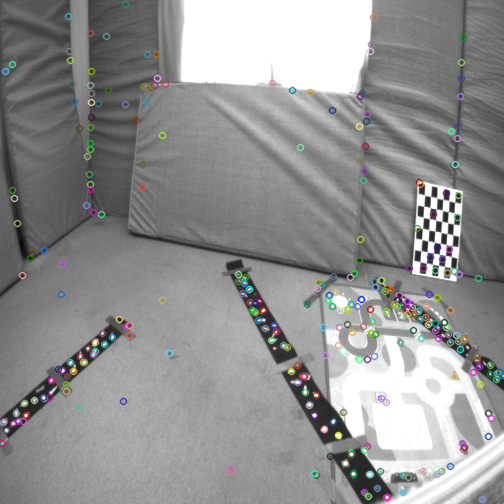

In [6]:
Painter.show_keypoints(name_a, level='image', filtered=False)

INFO     | show_keypoints | Number of Keypoints 125


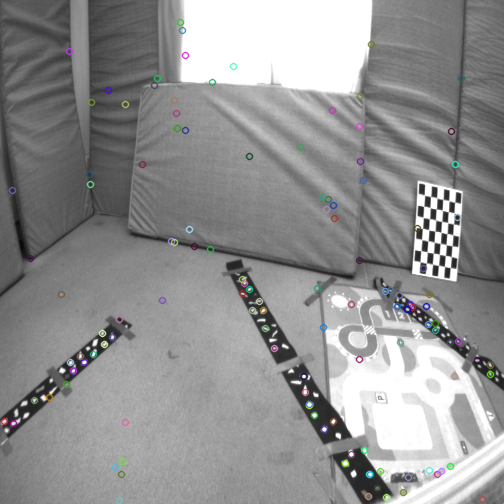

In [7]:
Painter.show_keypoints(name_a, level='both', filtered=True)

INFO     | _show_keypoints | Number of Keypoints 25


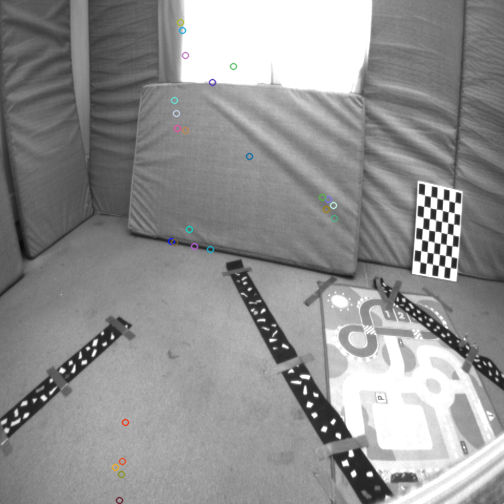

In [8]:
Painter.show_keypoints(name_a, level='patch', filtered=False)

In [9]:
# Painter.show_keypoints(name_a, level='patch', filtered=True)

# Matches

INFO     | show_matches | Number of Matches 264


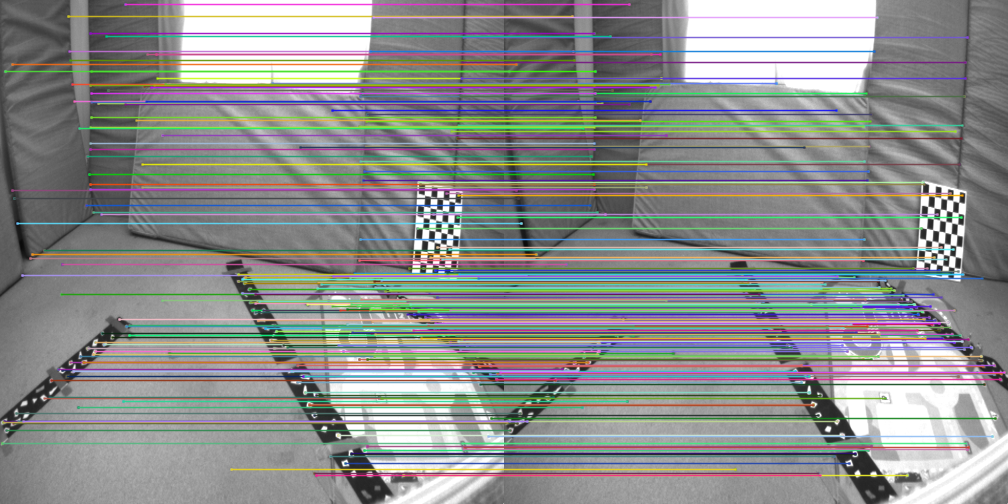

In [10]:
Painter.show_matches(name_a, name_b, num_points=None) 

INFO     | show_filtered_matches | Number of Matches 99


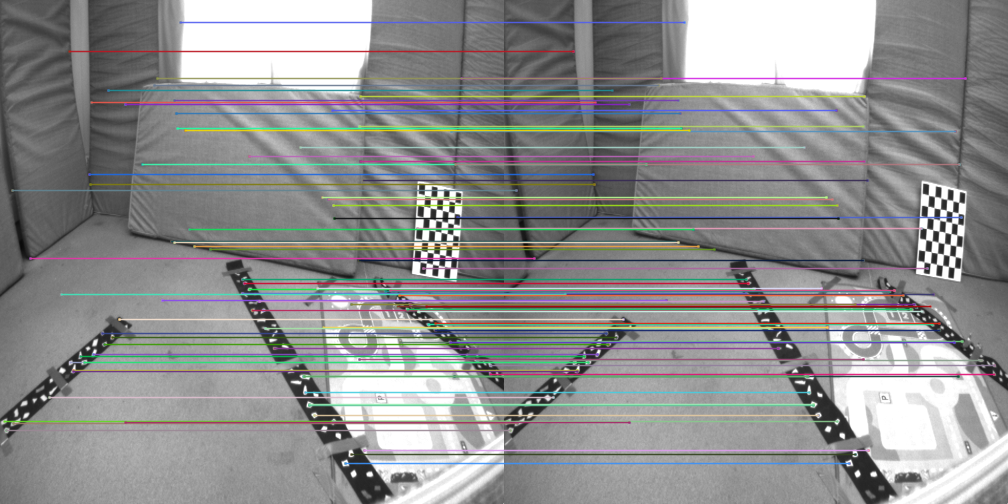

In [11]:
Painter.show_filtered_matches(name_a, name_b, num_points=None)

# Utils

In [12]:
def adjust_dimensions(height, width, scale_factor, patch_size=16):
    # Scale the dimensions
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    # Find the nearest dimension divisible by both 14 and patch_size
    def nearest_divisible(value, divisor):
        return value - (value % divisor) + (divisor if value % divisor != 0 else 0)
    
    # Ensure new dimensions are divisible by 14 and patch_size
    new_height = nearest_divisible(new_height, 14 * patch_size // 14)
    new_width = nearest_divisible(new_width, 14 * patch_size // 14)

    return new_height, new_width

# Example usage
original_height = 752
original_width = 480
scale_factor = 0.75
patch_size = 64

new_height, new_width = adjust_dimensions(original_height, original_width, scale_factor, patch_size)
print(f"Adjusted dimensions: {new_height}x{new_width}")


Adjusted dimensions: 576x384


In [1]:
def find_divisible_numbers(start, end, num1, num2):
    """
    Finds all numbers in the range [start, end] that are divisible by both num1 and num2.

    Parameters:
    start (int): The starting number of the range (inclusive).
    end (int): The ending number of the range (inclusive).
    num1 (int): The first divisor.
    num2 (int): The second divisor.

    Returns:
    list: A list of numbers divisible by both num1 and num2.
    """
    divisible_numbers = []

    for num in range(start, end + 1):
        if num % num1 == 0 and num % num2 == 0:
            divisible_numbers.append(num)

    return divisible_numbers

# Example usage
start = 400
end = 800
num1 = 14
num2 = 42
result = find_divisible_numbers(start, end, num1, num2)
print(f"Numbers divisible by {num1} and {num2} between {start} and {end}: {result}")


Numbers divisible by 14 and 42 between 400 and 800: [420, 462, 504, 546, 588, 630, 672, 714, 756, 798]


In [68]:
import random
from PIL import Image, ImageDraw

def crop_patches(image, coordinates, patch_size, draw_points=False, move_point=False, original_color=(255, 0, 0), new_color=(0, 255, 0)):
    patches = []
    width, height = image.size
    half_size = patch_size // 2
    
    for (x, y) in coordinates:
        # Calculate initial bounding box
        left = max(0, x - half_size)
        upper = max(0, y - half_size)
        right = min(width, x + half_size)
        lower = min(height, y + half_size)

        # Store the original coordinates for drawing
        new_x, new_y = x, y

        # Optionally add random movement to the point
        if move_point:
            # Shift can be anywhere from -half_size to +half_size
            x_shift = random.randint(-half_size, half_size)
            y_shift = random.randint(-half_size, half_size)

            # Update the new coordinates based on shifts
            new_x = x + x_shift
            new_y = y + y_shift

            # Update the bounding box based on the new coordinates
            left = max(0, new_x - half_size)
            upper = max(0, new_y - half_size)
            right = min(width, new_x + half_size)
            lower = min(height, new_y + half_size)

        # Crop the patch from the image
        patch = image.crop((left, upper, right, lower))
        
        # Draw points on the patch if draw_points is True
        if draw_points:
            draw = ImageDraw.Draw(patch)
            radius = 5  # Radius of the points to draw
            
            # Draw the original point (adjusted to be relative to the patch)
            orig_patch_x = x - left
            orig_patch_y = y - upper
            draw.ellipse((orig_patch_x - radius, orig_patch_y - radius, orig_patch_x + radius, orig_patch_y + radius), fill=original_color)
            
            # Draw the new point (adjusted to be relative to the patch)
            new_patch_x = new_x - left
            new_patch_y = new_y - upper
            draw.ellipse((new_patch_x - radius, new_patch_y - radius, new_patch_x + radius, new_patch_y + radius), fill=new_color)

        patches.append(patch)

    return patches

In [73]:
image = Image.open('/home/stud/ath/ath_ws/keypoint_dataset_pipeline/data/samples/images/im_A.jpg')
coordinates = [(250, 250), (1100, 300)]  
patch_size = 128

patches = crop_patches(image, coordinates, patch_size, draw_points=True, move_point=True)
patches[0], patches[1]

(<PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>)